#   <font color="#5A32EA">Análise de Sentimento com Machine Learning - CidTech</font> 

<img src="https://github.com/Paresqui/CidTech/blob/1df31d789a295e1e9edd3aa151e70409725bae0b/img2.png?raw=true:, width=100" alt="My Image" width=1800>

##   <font color="#5A32EA">Contexto</font> 


Neste notebook, irei realizar uma Análise de Sentimento dos dados referentes a entrevista idealizada pelo squad CidTech, a análise consiste em extrair informações de textos a partir do processamento de linguagem natural. O objetivo dessa técnica é classificar sentenças, ou um conjunto de sentenças, como positivas, negativas ou neutras. 


<font color="#2D35A8">[by Gabriela L. Paresqui](https://github.com/Paresqui)

##   <font color="#5A32EA">Leitura dos Dados</font> 

In [ ]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle


In [ ]:
#Importando a base de dados que será utilizada para treino
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
#Exibindo as 5 primeiras linhas 
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [ ]:
#Exibindo as principais informações sobre o dataframe e suas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Detalhes do primeiro review
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa


##   <font color="#5A32EA">Removendo Tags HTML</font> 

In [ ]:
#Removendo tags html 
def clean(text):
  cleaned = re.compile(r'<.*?>')
  return re.sub(cleaned,'',text)


df.review = df.review.apply(clean)
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

##   <font color="#5A32EA">Removendo Caracteres Especiais</font> 

In [ ]:
#Renovendo caracteres especiais
def is_special(text):
  rem = ' '
  for i in text:
     if i.isalnum():
       rem = rem + i
     else:
       rem = rem + ' '
  return rem 

df.review = df.review.apply(is_special)
df.review[0]

' One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows w

##   <font color="#5A32EA">Convertendo Texto para Caixa Baixa</font> 

In [ ]:
#Convertendo todo o texto para caixa baixa (to_lower)
def to_lower(text):
  return text.lower()

df.review = df.review.apply(to_lower)
df.review[0]

' one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows w


##   <font color="#5A32EA">Removendo Stop Words</font> 

Stopwords são palavras que existem no texto, mas que trazem pouco ou nenhum significado semântico. Elas geralmente são artigos, preposições, conjunções e alguns verbos. Dessa forma, será removida todas as stopwords para não causar ruídos nos algoritmos de aprendizado.

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

#Removendo as stopwords
def rem_stopwords(text):
  stop_words = set(stopwords.words('english'))
  word = word_tokenize(text)
  return [w for w in word if w not in stop_words]

df.review = df.review.apply(rem_stopwords)
df.review[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da


##   <font color="#5A32EA">Stemming</font>

É uma técnica que reduz um termo ao seu radical, removendo afixos e vogais temáticas. Um do seus objetivos é reduzir a quantidade de palavras na base de dados. A redução de vocabulário permite maior velocidade de processamento e menor número de erros causados por combinações não previstas.

In [ ]:
#Realizando o stemming do texto
def stem_text(text):
  ss = SnowballStemmer('english')
  return " ".join([ss.stem(w) for w in text])

df.review = df.review.apply(stem_text)
df.review[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'


##   <font color="#5A32EA">Bag of Words (BOW)</font>

É uma representação simplificada usada no processamento de linguagem natural e na recuperação de informações (IR). Neste modelo, um texto (como uma frase ou um documento) é representado como uma "bolsa de palavras" (multiset), desconsiderando a gramática e mesmo a ordem das palavras, mas mantendo a multiplicidade.

In [ ]:
#Criando a bag of words
x = np.array(df.iloc[:,0].values)
y = np.array(df.sentiment.values)
cv = CountVectorizer(max_features = 1000)
x = cv.fit_transform(df.review).toarray()
print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x.shape =  (50000, 1000)
y.shape =  (50000,)


In [ ]:
print(y)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']



##   <font color="#5A32EA">Train Test Split</font> 

In [ ]:
#Separando dados de treino e de teste
trainx,testx,trainy,testy = train_test_split(x,y, test_size=0.2,random_state=9)
print('Train shapes : x ={}, y = {}'.format(trainx.shape, trainy.shape))
print('Test shapes : x ={}, y = {}'.format(testx.shape, testy.shape))

Train shapes : x =(40000, 1000), y = (40000,)
Test shapes : x =(10000, 1000), y = (10000,)



##   <font color="#5A32EA">Definindo o Modelo e Realizando o Treinamento</font>

In [ ]:
#Importando modelos de classificação Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#Treinando os modelos
gnb,mnb,bnb = GaussianNB(), MultinomialNB(alpha=1.0, fit_prior=True), BernoulliNB(alpha=1.0, fit_prior=True)
gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)

BernoulliNB()


##   <font color="#5A32EA">Métricas de Previsão e Acurácia para Escolher o Melhor Modelo</font>

In [ ]:
#Realizando testes para definir o modelo com maior acurácia
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

In [ ]:
print('Gaussian =',accuracy_score(testy,ypg))
print('Multinomial =',accuracy_score(testy,ypm))
print('Bernoulli =',accuracy_score(testy,ypb))

Gaussian = 0.7843
Multinomial = 0.831
Bernoulli = 0.8386


In [ ]:
pickle.dump(bnb,open('mode1.pkl','wb'))


##   <font color="#5A32EA">Utilizando Machine Learning para Analisar Sentimentos dos Dados </font>

In [ ]:
#Realizando a predição 
resp = "It is currently difficult to bring more people into this medium, as most are only interested in money and money is speaking louder. But I believe that topics such as health and education would bring more people to be more interested in political activity."



f1 = clean(resp)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_text(f4)

bow, words = [], word_tokenize(f5)
for word in words:
  bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict, open('bow.pk1','wb'))

inp = []
for i in word_dict:
  inp.append(f5.count(i[0]))
y_pred = bnb.predict(np.array(inp).reshape(1,1000))

In [ ]:
#Resultado da predição
y_pred

array(['negative'], dtype='<U8')

##   <font color="#5A32EA">Nuvem de Palavras (Wordcloud) </font>

Wordcloud (em português, nuvem de palavras ou nuvem de tags) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Resumidamente, é como se você estivesse contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo elas também em ângulos diferentes.

In [1]:
#Importando as bibliotecas
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Importando a base de dados
df = pd.read_excel("Entrevistas_Total.xlsx")

In [2]:
#Exibindo as 5 primeiras linhas
df.head()

,Respostas,Sentimento,Emoções
0,"Procuro me informar pela internet, pois conver...",Positive,Angry
1,Nunca utilizei nenhum aplicativo de serviços d...,Positive,Happy
2,"Sim, eu participo ativamente de uma associação...",Neutral,Angry
3,"Na minha percepção, é altamente relevante, po...",Positive,Happy
4,Atualmente está difícil trazer mais pessoas pa...,Negative,Angry


In [3]:

#Eliminar as colunas com valores ausentes
respostas= df.dropna(subset=['Respostas'], axis=0)['Respostas']

In [4]:
#Concatenar as palavras
all_respostas = " ".join(s for s in respostas)

#Exibir quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_respostas)))

Quantidade de Palavras: 15815


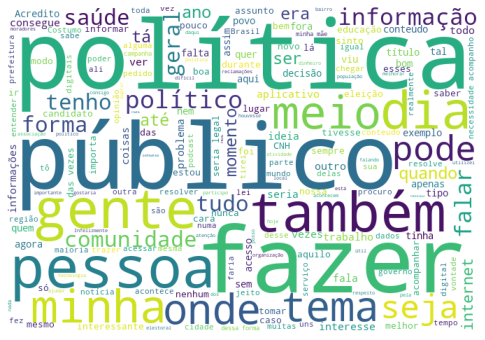

In [47]:
#Removendo as stopwords
stopwords = set(STOPWORDS)
stopwords.update(["da", "pois","que","ele","ela","ou","aí","algo","muita","essa","tem","pra","já","muito","sobre","ter", "na", "e", "meu","não","se","sei","eu","porque","um","vai","como","então","uma", "mas","por","isso","acho","coisa","esse","para","mais" ,"o", "a", "é", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                     # width=1600, height=800).generate(all_respostas)
                      width=675, height=467).generate(all_respostas)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("wordcloud1.png")

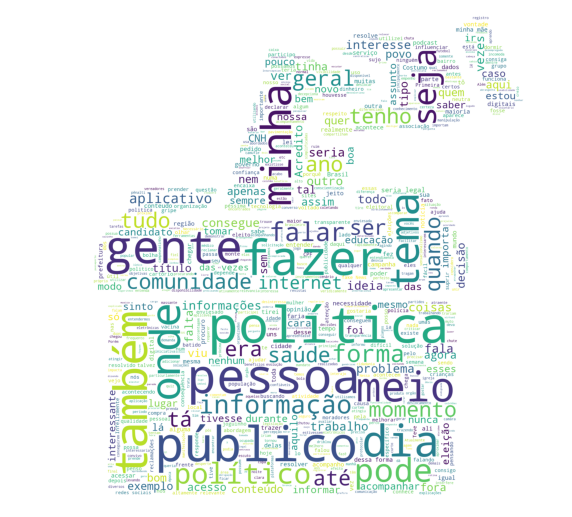

In [38]:
#Importando a imagem para criar wordcloud personalizada
rio_mask = np.array(Image.open("/content/urna.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_respostas)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("wordcloud2.png")

##   <font color="#5A32EA">Considerações Finais </font>

O presente notebook, teve como principal objetivo realizar uma análise de sentimentos dos dados categóricos coletados da entrevista e a realização da nuvem de palavras a partir desses dados. Durante esse processo, foi utilizada uma base de dados do IMDB com mais de 50k de reviews com a finalidade de treinar o algorítmo de Machine Learning Naive Bayes para classificar os dados e realizar as futuras predições de sentimentos. O modelo que obteve o melhor desempenho dos três modelos de classificação testados foi o BernoulliNB, com cerca de 83% de acurácia.